In [1]:
#Importing libraries for data analysis and visualization
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # creating static, interactive, and animated visualizations
import seaborn as sns # built on Matplotlib, provides a high-level interface for statistical graphics
import hvplot.pandas #a high-level plotting API built on HoloViews for interactive visualizations
import calendar #useful calendar-related functions, such as converting numeric month values to month names or abbreviations.
import plotly.express as px # for interactive plots

In [3]:
#File path
data_path="C:/Users/User/Desktop/My_project/Merged_Global_YouTube_and_Internet_Usage_Overview.csv"
#Load the Cleaned Dataset
data = pd.read_csv(data_path, encoding='ISO-8859-1')

In [5]:
#Get an overview of the dataset's structure and key statistics
# Dataset structure
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     906 non-null    int64  
 1   Youtuber                                 906 non-null    object 
 2   subscribers                              906 non-null    int64  
 3   video views                              906 non-null    float64
 4   category                                 906 non-null    object 
 5   Title                                    906 non-null    object 
 6   uploads                                  906 non-null    int64  
 7   Country                                  906 non-null    object 
 8   Abbreviation                             829 non-null    object 
 9   channel_type                             896 non-null    object 
 10  video_views_rank                         906 non-n

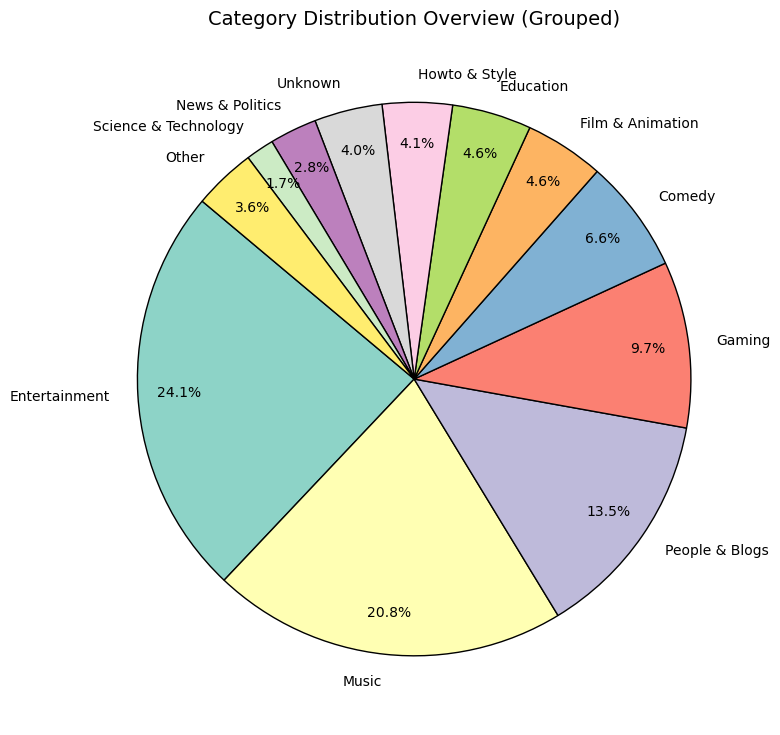

In [7]:
#Dataset Overview and Structure
#Pie Chart
#YouTube category percentages
category_percentages = data['category'].value_counts(normalize=True) * 100

# Group smaller categories into "Other"
threshold = 1.5
category_percentages_grouped = category_percentages.copy()
small_categories = category_percentages[category_percentages < threshold]
category_percentages_grouped = category_percentages[category_percentages >= threshold]
category_percentages_grouped['Other'] = small_categories.sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
category_percentages_grouped.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colormap='Set3',
    pctdistance=0.85,  # Adjust position of percentage labels
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Add black border to wedges
)
plt.title('Category Distribution Overview (Grouped)', fontsize=14)
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()

plt.savefig('C:/Users/User/Desktop/My_project/YouTube_category_percentages.png',dpi=300,bbox_inches='tight')

plt.show()


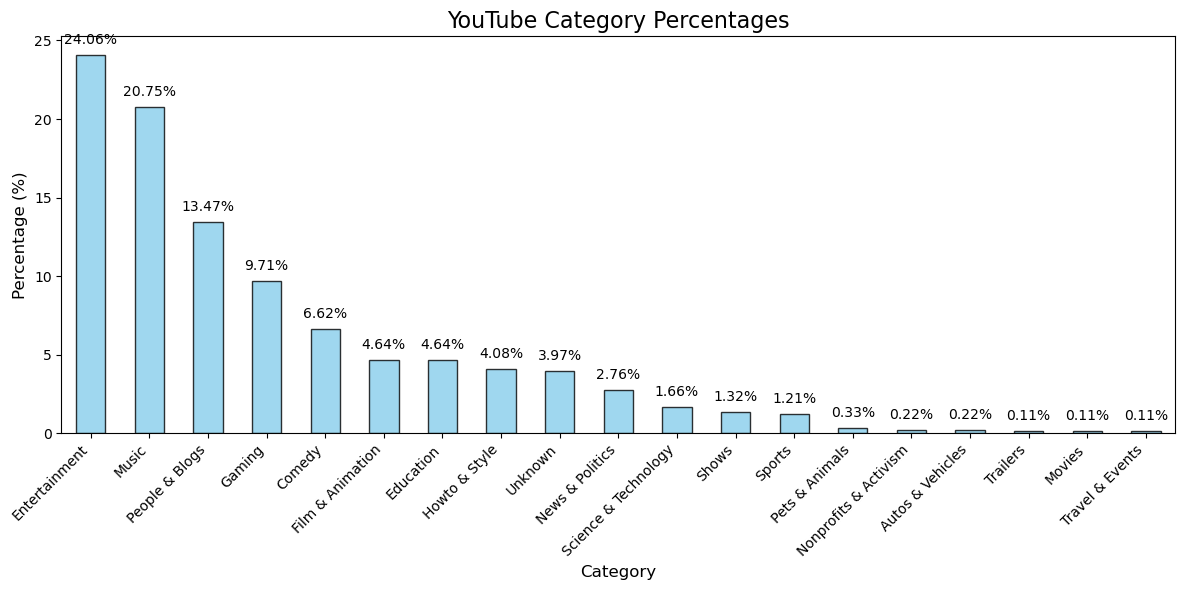

In [9]:
#A second Chart
# Calculate category percentages
category_percentages = data['category'].value_counts(normalize=True) * 100

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjusted size for better visibility
bars = category_percentages.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.8)

# Add title and axis labels
plt.title('YouTube Category Percentages', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Add percentage labels above each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # X-coordinate (center of bar)
             bar.get_height() + 0.5,             # Y-coordinate (slightly above the bar)
             f'{bar.get_height():.2f}%',         # Format to 2 decimal places
             ha='center', va='bottom', color='black', fontsize=10)

# Rotate x-axis labels if necessary for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping

plt.savefig('C:/Users/User/Desktop/My_project/YouTube_category_percentages2.png',dpi=300,bbox_inches='tight')


plt.show()


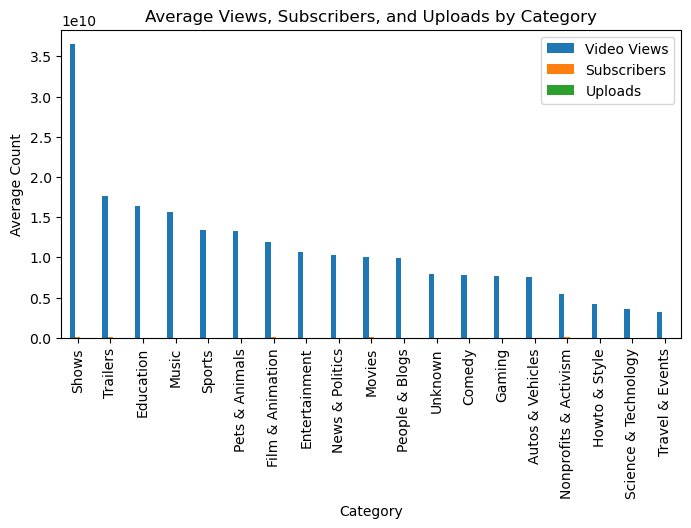

In [11]:
#Analyze Engagement Metrics
# Group by category and calculate averages
#Engagement Trends by Video Category
category_stats = data.groupby('category')[['video views', 'subscribers', 'uploads']].mean()

#Sort the data in descending order
category_stats=category_stats.sort_values(by='video views',ascending=False)

# Plot
category_stats.plot(kind='bar', figsize=(8, 4))
plt.title('Average Views, Subscribers, and Uploads by Category')
plt.ylabel('Average Count')
plt.xlabel('Category')
plt.legend(['Video Views', 'Subscribers', 'Uploads'])
#Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/category_stats_descendingk1.png',dpi=300,bbox_inches='tight')
#Show the plot
plt.show()


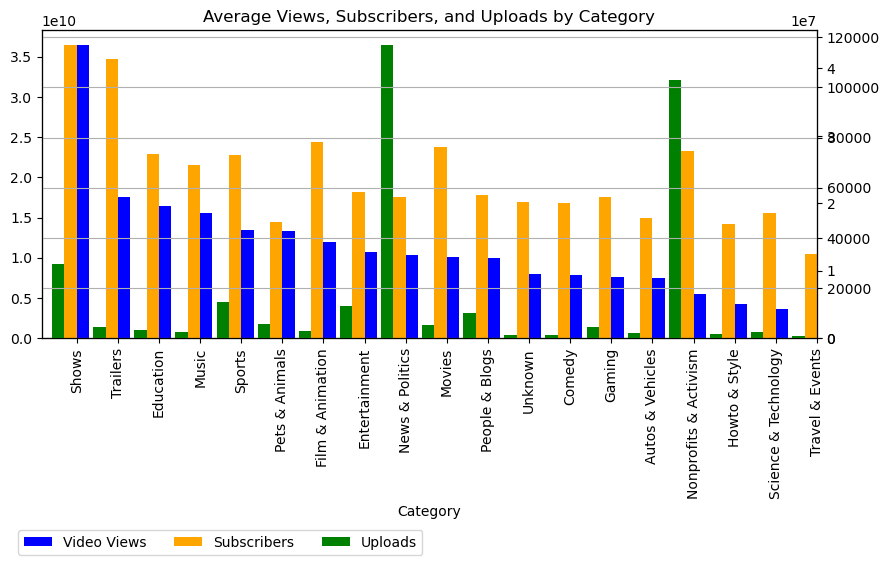

In [13]:
# Group by category and calculate averages
category_stats = data.groupby('category')[['video views', 'subscribers', 'uploads']].mean()

# Add a column for the sum of engagement metrics to order categories
category_stats['total_engagement'] = category_stats.sum(axis=1)

# Sort the categories based on total engagement in descending order
category_stats = category_stats.sort_values('total_engagement', ascending=False)

# Drop the total_engagement column for the plot
category_stats = category_stats.drop(columns='total_engagement')

# Plot grouped bar chart with secondary y-axis
fig, ax1 = plt.subplots(figsize=(10, 4))

category_stats['video views'].plot(kind='bar', ax=ax1, position=0, width=0.3, color='blue', label='Video Views')
ax2 = ax1.twinx()
category_stats['subscribers'].plot(kind='bar', ax=ax2, position=1, width=0.3, color='orange', label='Subscribers')
ax3 = ax1.twinx()
category_stats['uploads'].plot(kind='bar', ax=ax3, position=2, width=0.3, color='green', label='Uploads')

# Set the title and labels
ax1.set_title('Average Views, Subscribers, and Uploads by Category')
ax1.set_xlabel('Category')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper right', bbox_to_anchor=(0.5, -0.6), ncol=3)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid()

# Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/average_metrics_by_category_k1.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


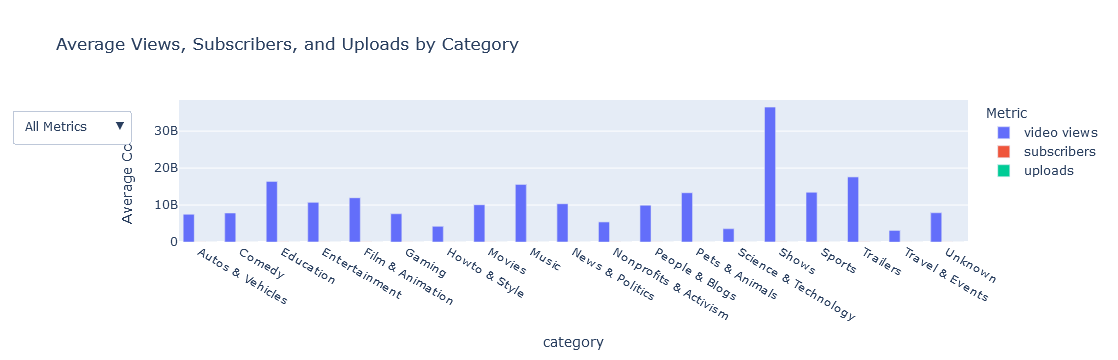

In [15]:
#Create an Interactive Chart
# Group by category and calculate averages
category_stats = data.groupby('category')[['video views', 'subscribers', 'uploads']].mean().reset_index()

# Melt the DataFrame to long format for Plotly
category_stats_melted = category_stats.melt(id_vars='category', var_name='Metric', value_name='Average Count')

# Create the interactive bar chart
fig = px.bar(category_stats_melted, x='category', y='Average Count', color='Metric', 
             barmode='group', title='Average Views, Subscribers, and Uploads by Category')

# Update the layout to add dropdown for metrics
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["y", "Average Count"],
                    label="All Metrics",
                    method="restyle"
                ),
                dict(
                    args=[{"visible": [True, False, False]}],
                    label="Video Views",
                    method="restyle"
                ),
                dict(
                    args=[{"visible": [False, True, False]}],
                    label="Subscribers",
                    method="restyle"
                ),
                dict(
                    args=[{"visible": [False, False, True]}],
                    label="Uploads",
                    method="restyle"
                ),
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
        ),
    ]
)

# Show the interactive plot
fig.show()


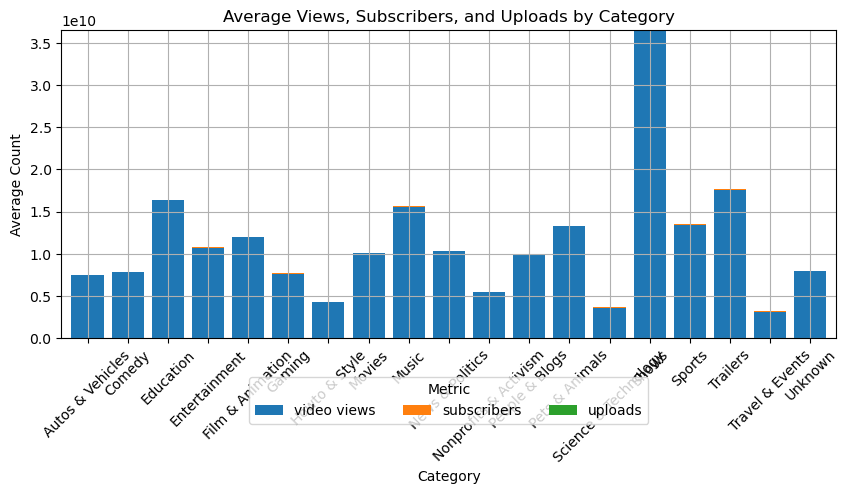

In [17]:
# Group by category and calculate averages
category_stats = data.groupby('category')[['video views', 'subscribers', 'uploads']].mean()

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 4))

category_stats.plot(kind='bar', stacked=True, ax=ax, width=0.8)

# Set the title and labels
ax.set_title('Average Views, Subscribers, and Uploads by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Average Count')

# Add legend
plt.legend(title='Metric', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid()

# Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/average_metrics_by_category_stackedk1.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


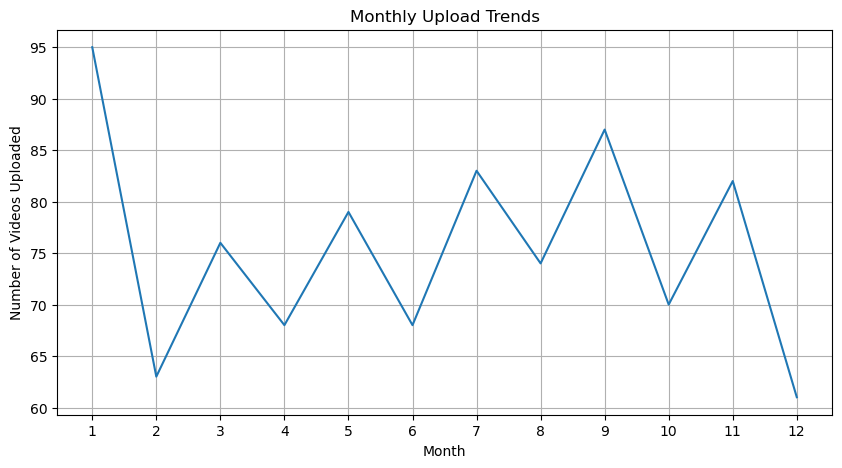

In [19]:
#Analyze upload trends over time
# Convert creation date to datetime
data['created_date_standardized'] = pd.to_datetime(data['created_date_standardized'])

# Extract month and count uploads
data['created_month'] = data['created_date_standardized'].dt.month
monthly_uploads = data.groupby('created_month').size()

# Plot
monthly_uploads.plot(kind='line', figsize=(10, 5))
plt.title('Monthly Upload Trends')
plt.ylabel('Number of Videos Uploaded')
plt.xlabel('Month')
plt.xticks(range(1, 13))
plt.grid()

#Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/monthly_upload_trendsk1.png',dpi=300,bbox_inches='tight')

#Show the plot
plt.show()

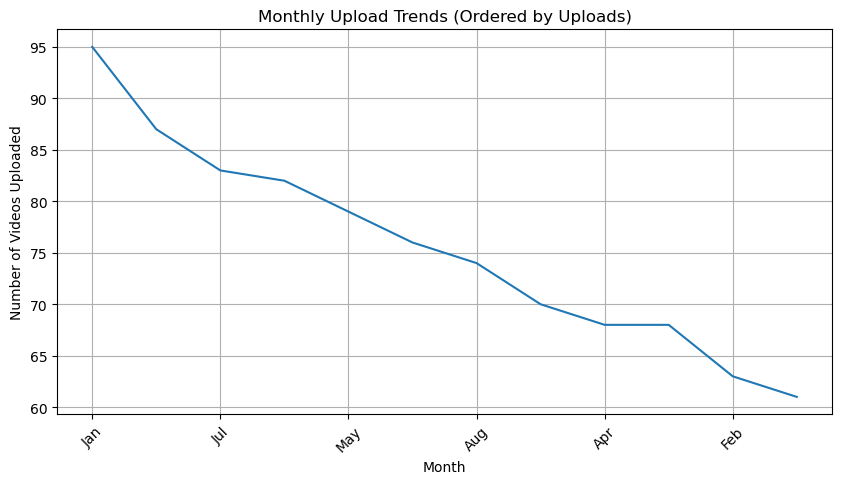

In [21]:
# Convert creation date to datetime
data['created_date_standardized'] = pd.to_datetime(data['created_date_standardized'])

# Extract month and count uploads
data['created_month'] = data['created_date_standardized'].dt.month
monthly_uploads = data.groupby('created_month').size()

# Sort the months by number of uploads in descending order
monthly_uploads_sorted = monthly_uploads.sort_values(ascending=False)

# Reindex for plotting with the new order
monthly_uploads_sorted.index = monthly_uploads_sorted.index.map(lambda x: calendar.month_abbr[x])

# Plot
monthly_uploads_sorted.plot(kind='line', figsize=(10, 5))
plt.title('Monthly Upload Trends (Ordered by Uploads)')
plt.ylabel('Number of Videos Uploaded')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid()

# Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/monthly_upload_trends_orderedk1.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

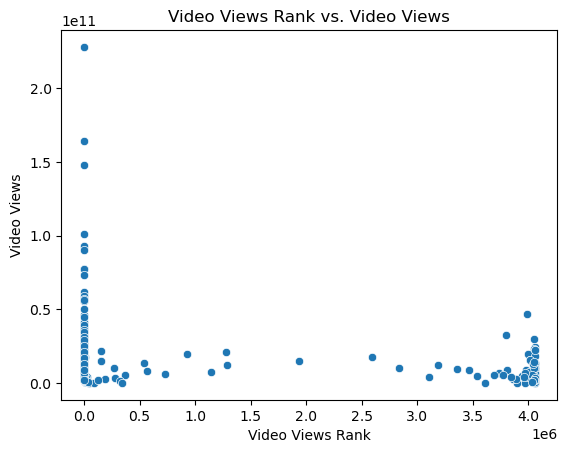

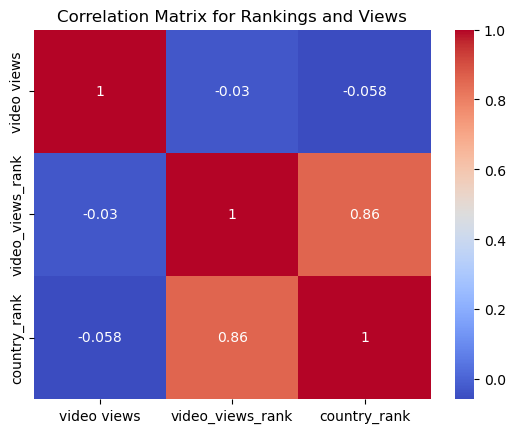

In [23]:
#Correlation Between Rankings and Views
#Investigate how video_views_rank and country_rank relate to engagement
# Scatter plot for video views rank vs. video views
sns.scatterplot(x='video_views_rank', y='video views', data=data)
plt.title('Video Views Rank vs. Video Views')
plt.xlabel('Video Views Rank')
plt.ylabel('Video Views')

#Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/video_views_rank_vs_video_viewsk1.png',dpi=300,bbox_inches='tight')

plt.show()

# Correlation matrix
correlation_matrix = data[['video views', 'video_views_rank', 'country_rank']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Rankings and Views')

#Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/video_views_rank_vs_video_views_vs_country_rankk1.png',dpi=300,bbox_inches='tight')

#Show the plot
plt.show()

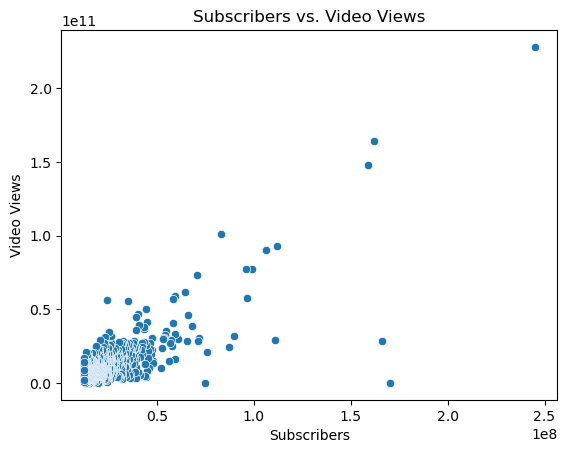

In [25]:
#Correlation Between Subscribers and Views
#Examine relationships between subscriber counts and video views
# Scatter plot
sns.scatterplot(x='subscribers', y='video views', data=data)
plt.title('Subscribers vs. Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')

#Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/subscribers_vs_video_viewsk1.png',dpi=300,bbox_inches='tight')

#Show the plot
plt.show()

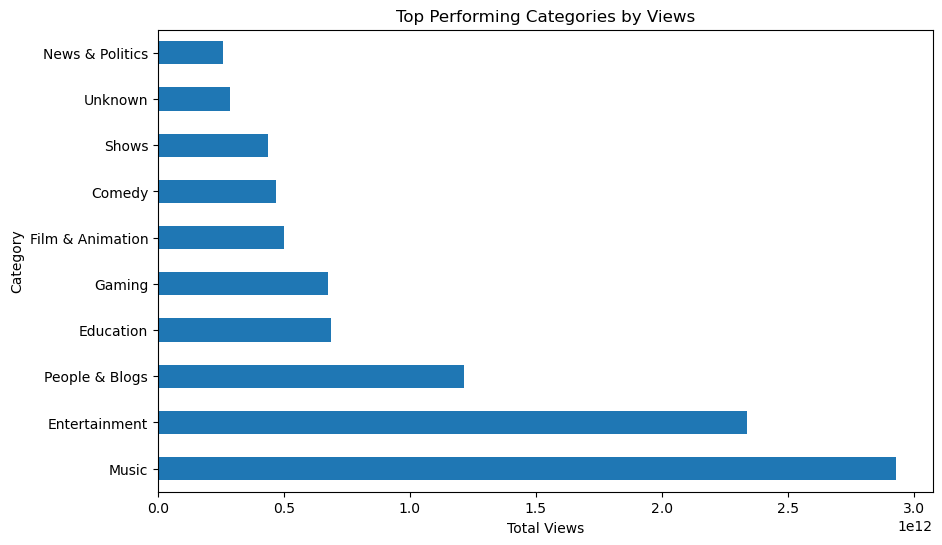

In [27]:
#Top Performing Categories
#Analyze the performance of categories in terms of views and uploads
# Sum views by category
top_categories = data.groupby('category')['video views'].sum().sort_values(ascending=False)

# Plot
top_categories.head(10).plot(kind='barh', figsize=(10, 6))
plt.title('Top Performing Categories by Views')
plt.xlabel('Total Views')
plt.ylabel('Category')

#Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/top_categories_by_viewsk1.png',dpi=300,bbox_inches='tight')

#Show the plot
plt.show()

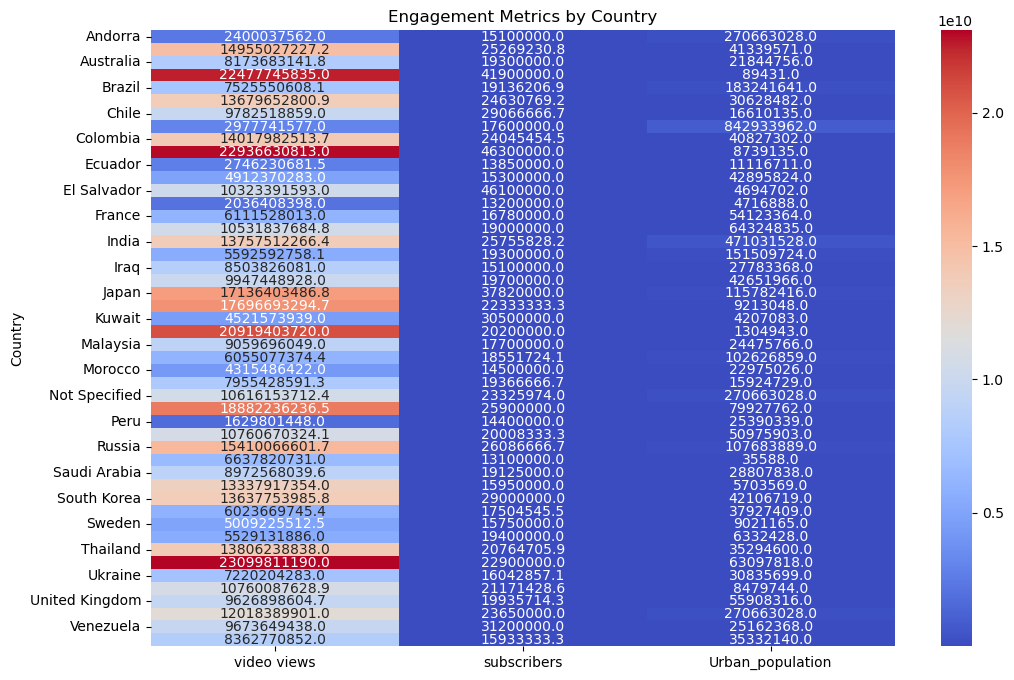

In [29]:
#Analyze audience engagement across countries
# Aggregate engagement metrics by country
country_stats = data.groupby('Country')[['video views', 'subscribers', 'Urban_population']].mean()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(country_stats, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Engagement Metrics by Country')

#Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/engagement_by_countriesk1.png',dpi=300,bbox_inches='tight')

#Show the plot
plt.show()

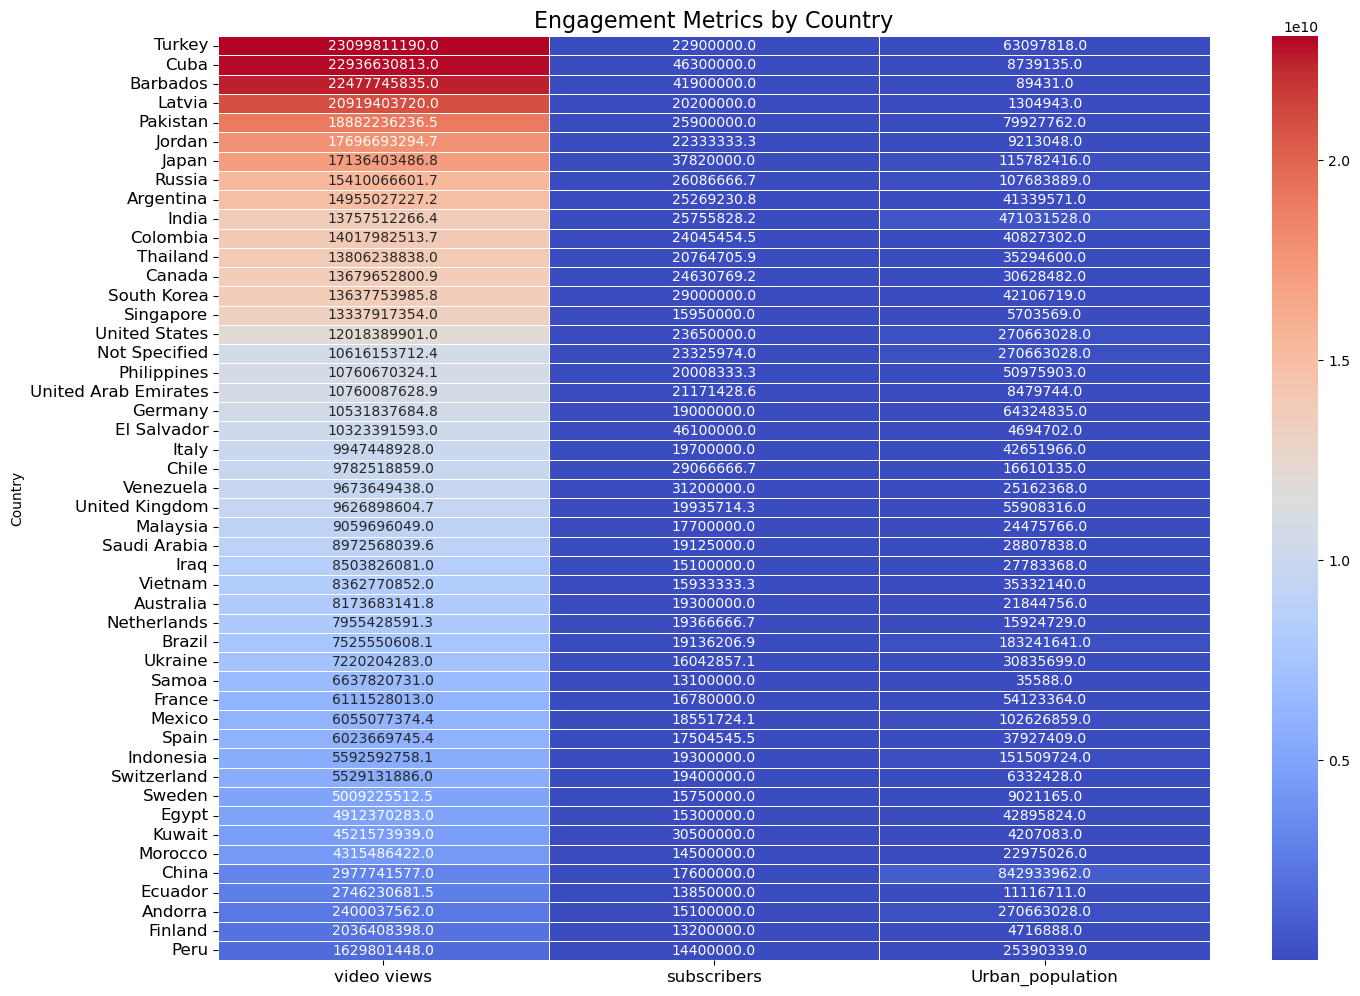

In [31]:
# Aggregate engagement metrics by country
country_stats = data.groupby('Country')[['video views', 'subscribers', 'Urban_population']].mean()

# Add a column for the sum of engagement metrics to order countries
country_stats['total_engagement'] = country_stats.sum(axis=1)

# Sort the countries based on total engagement in descending order
country_stats = country_stats.sort_values('total_engagement', ascending=False)

# Drop the total_engagement column for the heatmap
country_stats = country_stats.drop(columns='total_engagement')

# Plot heatmap
plt.figure(figsize=(16, 12))  # Increase the figure size
sns.heatmap(country_stats, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5, annot_kws={"size": 10})
plt.title('Engagement Metrics by Country', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/engagement_by_countries_descendingk11.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


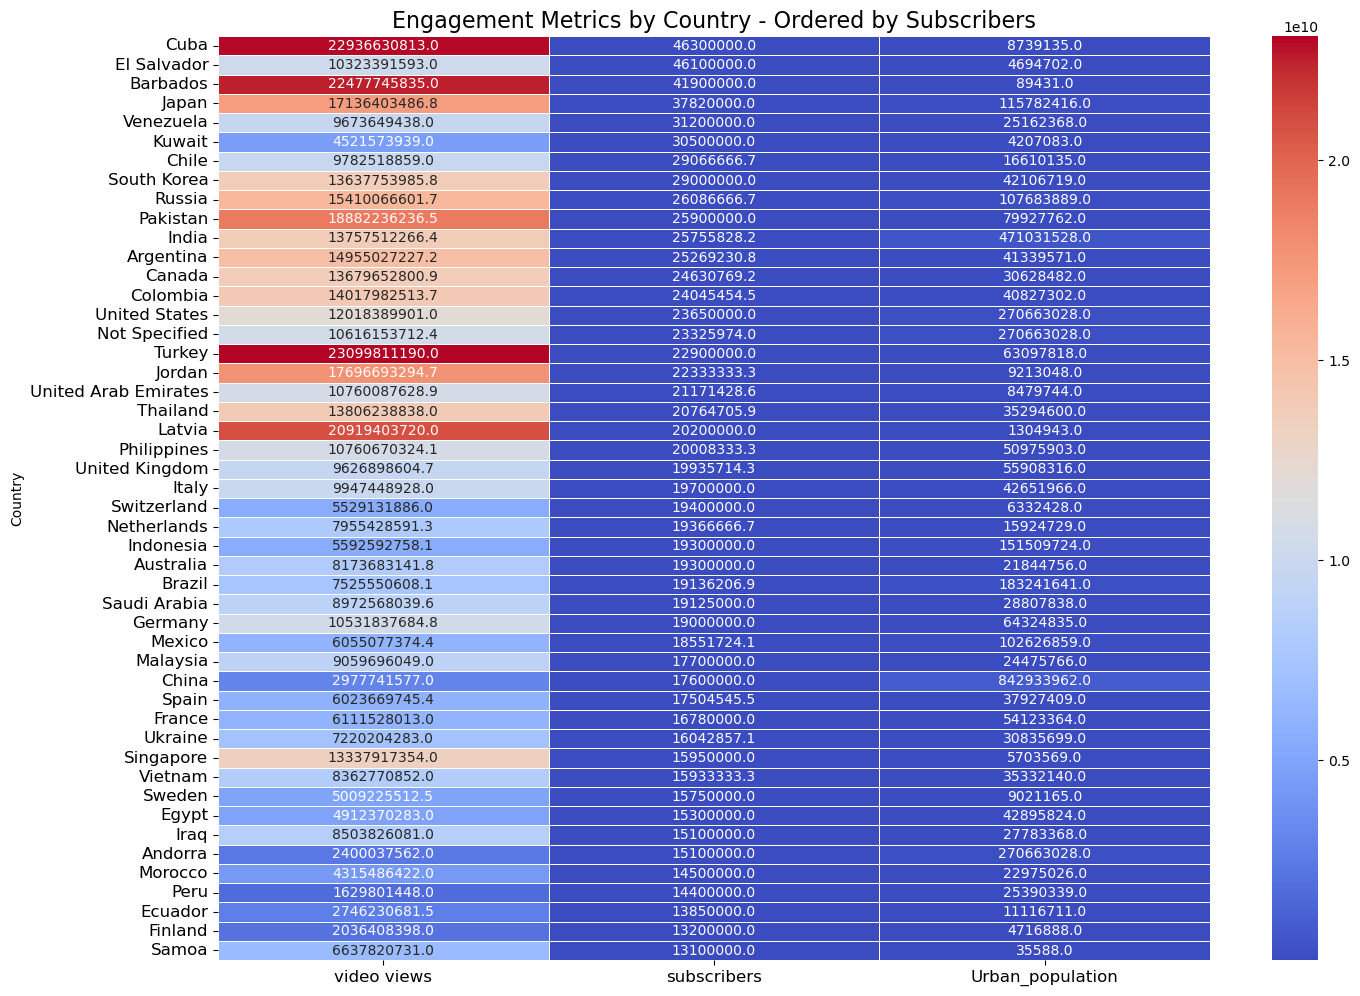

In [33]:
# Aggregate engagement metrics by country ordered by Subscribers
country_stats = data.groupby('Country')[['video views', 'subscribers', 'Urban_population']].mean()

# Sort the countries based on the number of subscribers in descending order
country_stats = country_stats.sort_values('subscribers', ascending=False)

# Plot heatmap
plt.figure(figsize=(16, 12))  # Increase the figure size
sns.heatmap(country_stats, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5, annot_kws={"size": 10})
plt.title('Engagement Metrics by Country - Ordered by Subscribers', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/engagement_by_subscribers_descending.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


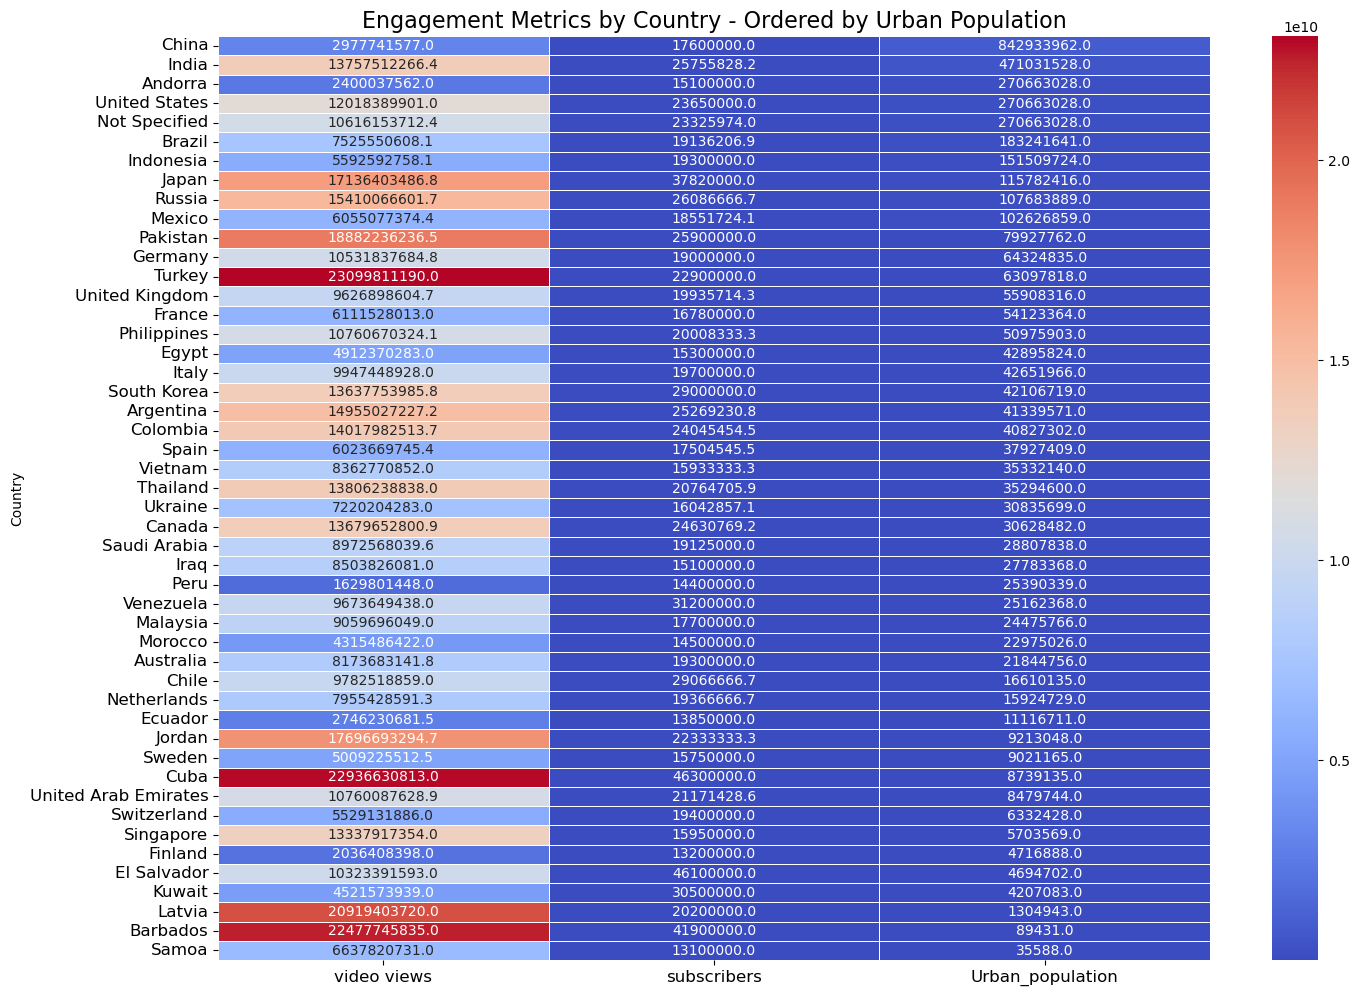

In [35]:
# Aggregate engagement metrics by country ordered by Urban Population
country_stats = data.groupby('Country')[['video views', 'subscribers', 'Urban_population']].mean()

# Sort the countries based on urban population in descending order
country_stats = country_stats.sort_values('Urban_population', ascending=False)

# Plot heatmap
plt.figure(figsize=(16, 12))  # Increase the figure size
sns.heatmap(country_stats, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5, annot_kws={"size": 10})
plt.title('Engagement Metrics by Country - Ordered by Urban Population', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/engagement_by_urban_population_descending.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


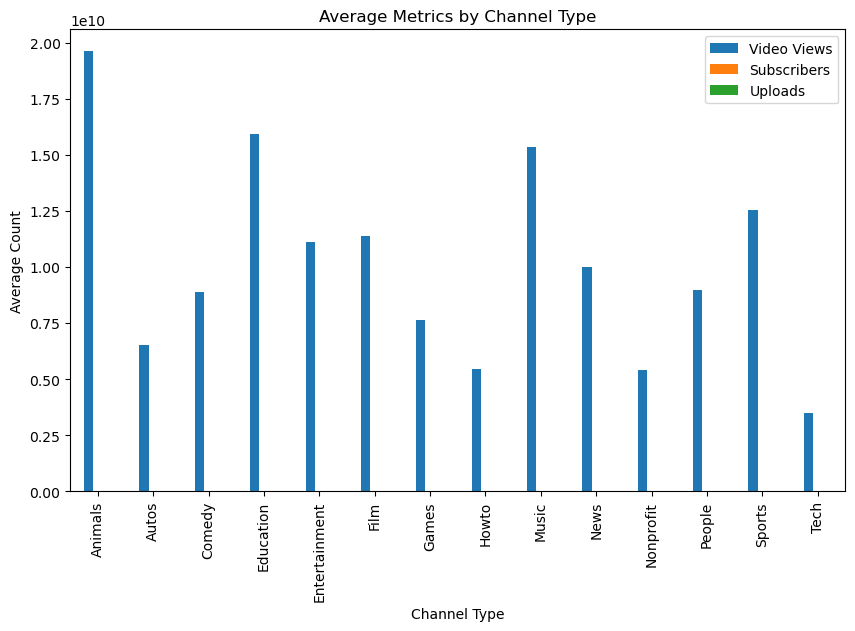

In [37]:
#Additional analyze Impact of Channel Type
# Group by channel type and calculate averages
channel_type_stats = data.groupby('channel_type')[['video views', 'subscribers', 'uploads']].mean()

# Plot
channel_type_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Average Metrics by Channel Type')
plt.ylabel('Average Count')
plt.xlabel('Channel Type')
plt.legend(['Video Views', 'Subscribers', 'Uploads'])

#Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/average_metrics_by_channel_typek1.png',dpi=300,bbox_inches='tight')

#Show the plot
plt.show()


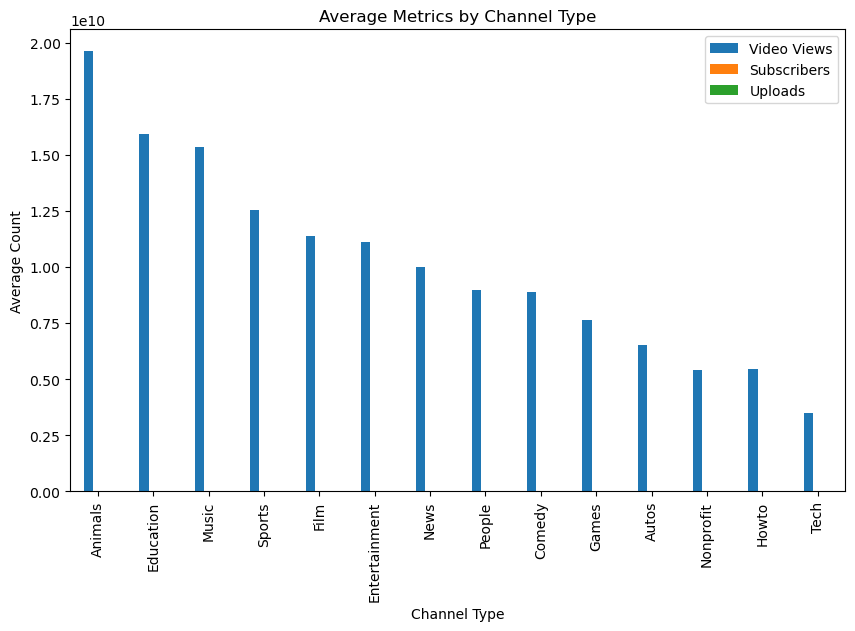

In [39]:
# Group by channel type and calculate averages
channel_type_stats = data.groupby('channel_type')[['video views', 'subscribers', 'uploads']].mean()

# Add a column for the sum of engagement metrics to order channel types
channel_type_stats['total_engagement'] = channel_type_stats.sum(axis=1)

# Sort the channel types based on total engagement in descending order
channel_type_stats = channel_type_stats.sort_values('total_engagement', ascending=False)

# Drop the total_engagement column for the plot
channel_type_stats = channel_type_stats.drop(columns='total_engagement')

# Plot
channel_type_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Average Metrics by Channel Type')
plt.ylabel('Average Count')
plt.xlabel('Channel Type')
plt.legend(['Video Views', 'Subscribers', 'Uploads'])

# Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/average_metrics_by_channel_type_descendingk1.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


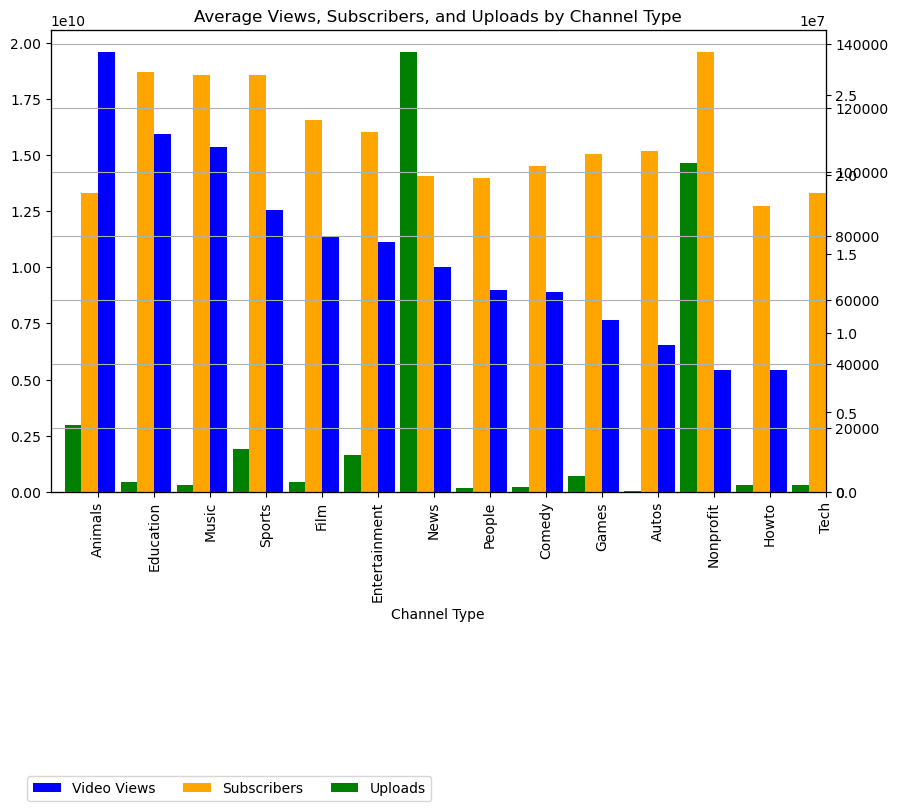

In [41]:
# Group by channel type and calculate averages
channel_type_stats = data.groupby('channel_type')[['video views', 'subscribers', 'uploads']].mean()

# Add a column for the sum of engagement metrics to order channel types
channel_type_stats['total_engagement'] = channel_type_stats.sum(axis=1)

# Sort the channel types based on total engagement in descending order
channel_type_stats = channel_type_stats.sort_values('total_engagement', ascending=False)

# Drop the total_engagement column for the plot
channel_type_stats = channel_type_stats.drop(columns='total_engagement')

# Plot grouped bar chart with secondary y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

channel_type_stats['video views'].plot(kind='bar', ax=ax1, position=0, width=0.3, color='blue', label='Video Views')
ax2 = ax1.twinx()
channel_type_stats['subscribers'].plot(kind='bar', ax=ax2, position=1, width=0.3, color='orange', label='Subscribers')
ax3 = ax1.twinx()
channel_type_stats['uploads'].plot(kind='bar', ax=ax3, position=2, width=0.3, color='green', label='Uploads')

# Set the title and labels
ax1.set_title('Average Views, Subscribers, and Uploads by Channel Type')
ax1.set_xlabel('Channel Type')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper right', bbox_to_anchor=(0.5, -0.6), ncol=3)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid()

# Save the plot as PNG image
plt.savefig('C:/Users/User/Desktop/My_project/average_metrics_by_channel_type0k1.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


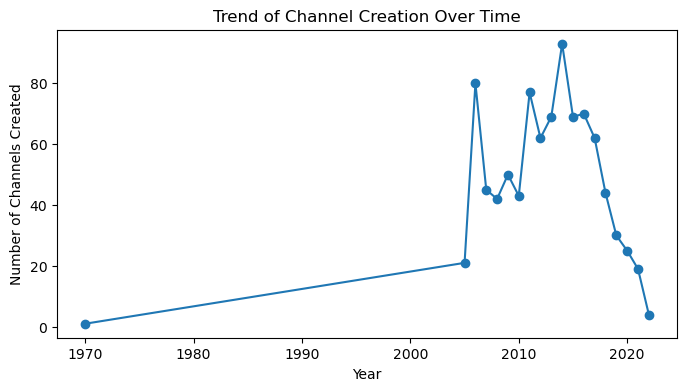

In [43]:
# Channel Creation Trends
# Group by year of creation
data['created_year'] = pd.to_datetime(data['created_date_standardized']).dt.year
creation_trends = data['created_year'].value_counts().sort_index()

# Plot line chart
creation_trends.plot(kind='line', figsize=(8, 4), marker='o')
plt.title('Trend of Channel Creation Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Channels Created')

plt.savefig('C:/Users/User/Desktop/My_project/Channel_Creation_Trendsk.png', dpi=300, bbox_inches='tight')

plt.show()


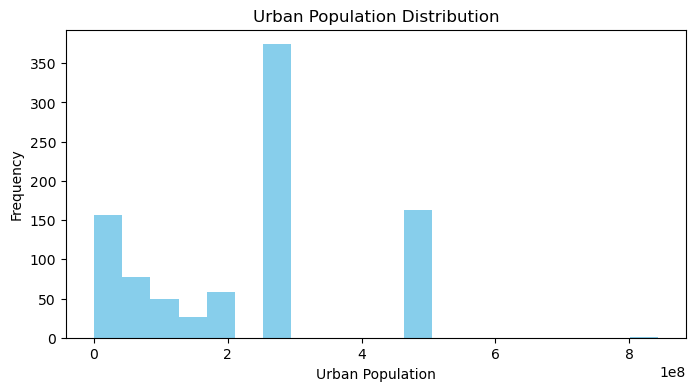

In [45]:
#Urban Population Distribution

# Plot histogram
data['Urban_population'].plot(kind='hist', bins=20, figsize=(8, 4), color='skyblue')
plt.title('Urban Population Distribution')
plt.xlabel('Urban Population')
plt.ylabel('Frequency')

plt.savefig('C:/Users/User/Desktop/My_project/Urban_Population_Distribution.png', dpi=300, bbox_inches='tight')

plt.show()


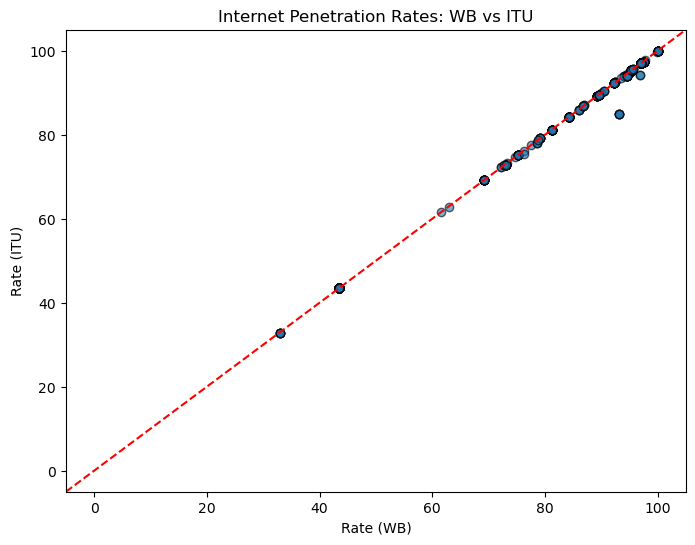

In [47]:
#Internet Penetration Rates Comparison (Rate WB vs. Rate ITU)

plt.figure(figsize=(8, 6))
plt.scatter(data['Rate (WB)'], data['Rate (ITU)'], alpha=0.6, edgecolors='k')
plt.title('Internet Penetration Rates: WB vs ITU')
plt.xlabel('Rate (WB)')
plt.ylabel('Rate (ITU)')
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Equality line

plt.savefig('C:/Users/User/Desktop/My_project/Penetration_Rates.png', dpi=300, bbox_inches='tight')


plt.show()


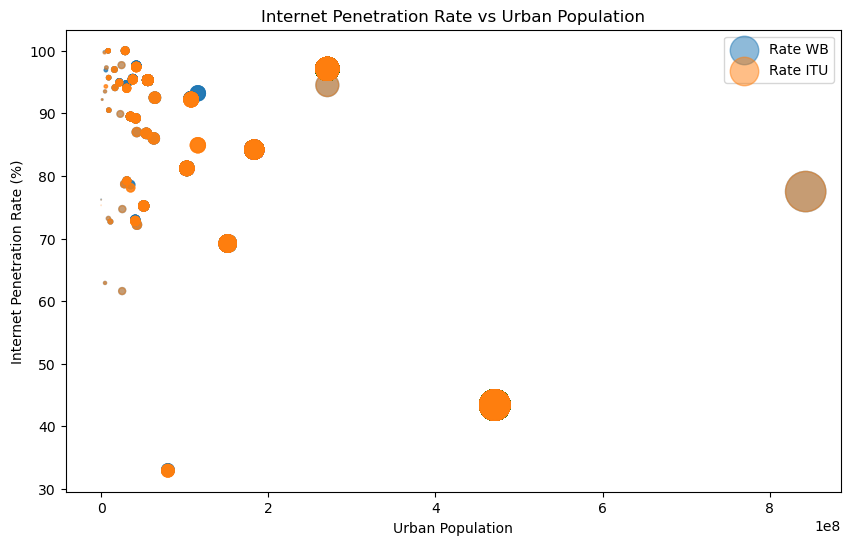

In [49]:
#Internet Penetration Rate by Urban Population
plt.figure(figsize=(10, 6))
plt.scatter(data['Urban_population'], data['Rate (WB)'], s=data['Urban_population'] / 1e6, alpha=0.5, label='Rate WB')
plt.scatter(data['Urban_population'], data['Rate (ITU)'], s=data['Urban_population'] / 1e6, alpha=0.5, label='Rate ITU')
plt.title('Internet Penetration Rate vs Urban Population')
plt.xlabel('Urban Population')
plt.ylabel('Internet Penetration Rate (%)')
plt.legend()

plt.savefig('C:/Users/User/Desktop/My_project/Internet_Penetration_Ratek1.png', dpi=300, bbox_inches='tight')

plt.show()


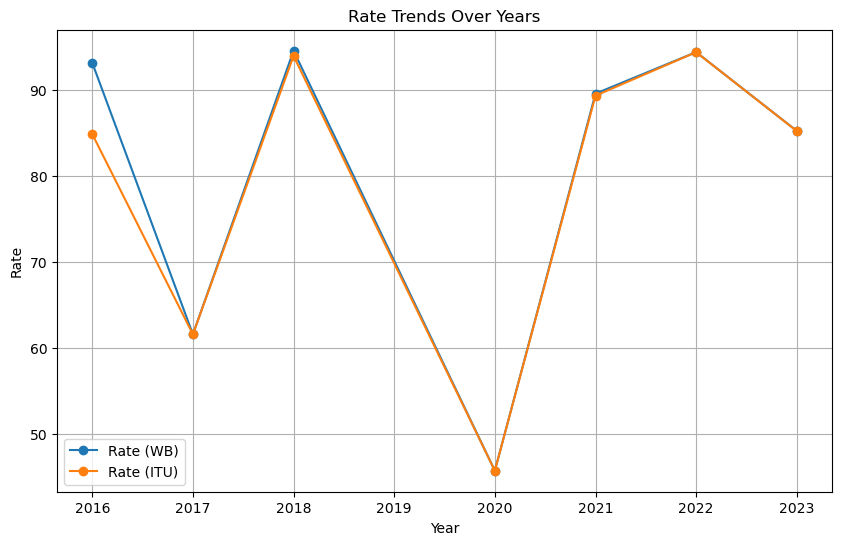

In [51]:
#Comparison of Internet Penetration Rates Over Time
# Ensure numeric conversion for the columns, invalid parsing will be set as NaN
data['Rate (WB)'] = pd.to_numeric(data['Rate (WB)'], errors='coerce')
data['Rate (ITU)'] = pd.to_numeric(data['Rate (ITU)'], errors='coerce')

# Drop rows with missing values in the relevant columns
data = data.dropna(subset=['Year', 'Rate (WB)', 'Rate (ITU)'])

# Group by 'Year' and calculate the mean for numeric columns
rate_trends = data.groupby('Year')[['Rate (WB)', 'Rate (ITU)']].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(rate_trends.index, rate_trends['Rate (WB)'], label='Rate (WB)', marker='o')
plt.plot(rate_trends.index, rate_trends['Rate (ITU)'], label='Rate (ITU)', marker='o')
plt.title('Rate Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)

plt.savefig('C:/Users/User/Desktop/My_project/Internet_Penetration_Rates_Over_Time.png', dpi=300, bbox_inches='tight')


plt.show()


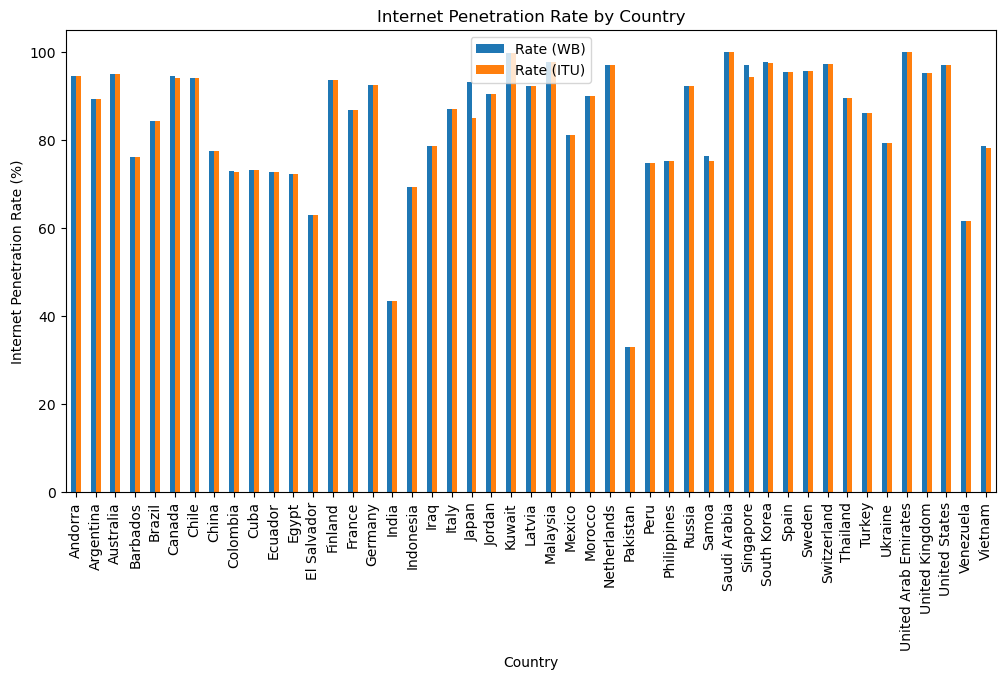

In [53]:
#Bar Chart for Internet Penetration Rate by Country
# Aggregate the average rates for each country
country_rates = data.groupby('Country')[['Rate (WB)', 'Rate (ITU)']].mean()

# Plot bar chart
country_rates.plot(kind='bar', figsize=(12, 6))
plt.title('Internet Penetration Rate by Country')
plt.xlabel('Country')
plt.ylabel('Internet Penetration Rate (%)')

#Save the Plot
plt.savefig('C:/Users/User/Desktop/My_project/Internet_Penetration_Rates_by_Country_Bar.png', dpi=300, bbox_inches='tight')

plt.show()

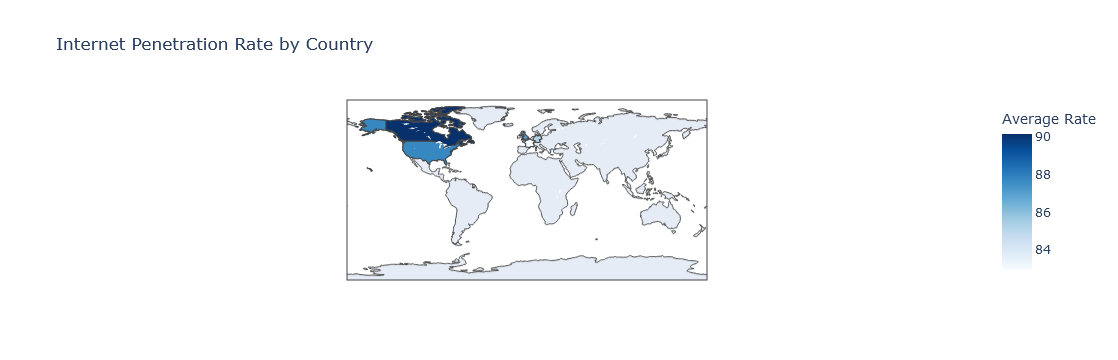

<Figure size 640x480 with 0 Axes>

In [55]:
#choropleth map for Internet Penetration Rate by Country
# Sample DataFrame for illustration purposes
data = pd.DataFrame({
    'Country': ['United States', 'Canada', 'United Kingdom', 'Germany', 'France'],
    'Rate (WB)': [88.0, 90.5, 87.3, 85.6, 83.4],
    'Rate (ITU)': [87.5, 89.8, 86.9, 84.7, 82.5]
})

# Average rates for each country
data['Average Rate'] = data[['Rate (WB)', 'Rate (ITU)']].mean(axis=1)

# Create choropleth map
fig = px.choropleth(data_frame=data, locations='Country', locationmode='country names',
                    color='Average Rate', hover_name='Country', color_continuous_scale='Blues',
                    title='Internet Penetration Rate by Country')
#Save the Plot
plt.savefig('C:/Users/User/Desktop/My_project/Internet_Penetration_Rates_by_Country_choropleth_map.png', dpi=300, bbox_inches='tight')

# Show map
fig.show()


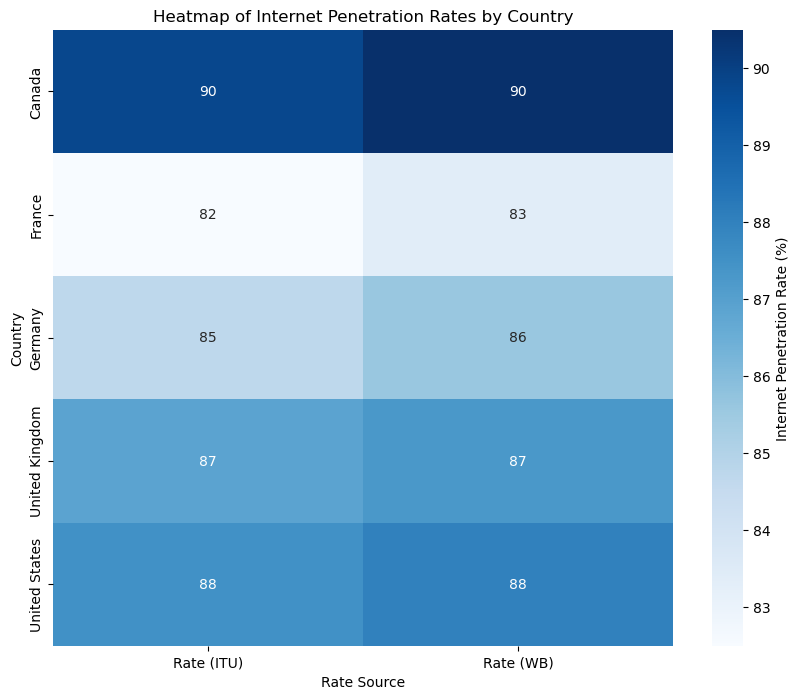

In [57]:
# Sample DataFrame for illustration purposes
data = pd.DataFrame({
    'Country': ['United States', 'Canada', 'United Kingdom', 'Germany', 'France'],
    'Rate (WB)': [88.0, 90.5, 87.3, 85.6, 83.4],
    'Rate (ITU)': [87.5, 89.8, 86.9, 84.7, 82.5]
})

# Melt DataFrame for heatmap
data_melted = data.melt(id_vars='Country', value_vars=['Rate (WB)', 'Rate (ITU)'], 
                        var_name='Rate Source', value_name='Penetration Rate')

# Pivot DataFrame for heatmap
data_pivot = data_melted.pivot(index='Country', columns='Rate Source', values='Penetration Rate')

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_pivot, annot=True, cmap='Blues', cbar_kws={'label': 'Internet Penetration Rate (%)'})
plt.title('Heatmap of Internet Penetration Rates by Country')

#Save the Plot
plt.savefig('C:/Users/User/Desktop/My_project/Internet_Penetration_Rates_by_Country_Heat_Map.png', dpi=300, bbox_inches='tight')


plt.show()
